In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(tf.test.is_gpu_available())
print('-'*30)
print(tf.test.gpu_device_name())
print('-'*30)
print(tf.config.list_physical_devices('GPU'))
print('-'*30)
print(device_lib.list_local_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
------------------------------
/device:GPU:0
------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
------------------------------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5890266573551623371
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9963843584
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3645701728387507878
physical_device_desc: "device: 0, name: NVIDIA TITAN V, pci bus id: 0000:01:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


In [3]:
segseg_path = r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\original_segseg/'
#vessel_path = r'N:\2_Analysis\automated_analysis\flint_segmentations\vessel_segmentations\2 point masks -mb/'

output_dir = r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\vessel_segmentation/'

print(segseg_path)
#print(vessel_path)
print(output_dir)

N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\original_segseg/
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\vessel_segmentation/


In [4]:
case_id = 'f_2429'

segseg_id = os.path.join(segseg_path + case_id + '_edited.nii')
vessel_id = os.path.join(vessel_path + case_id + '-vessels-only-mb.nii.gz')

print(segseg_id)
print(vessel_id)

N:\2_Analysis\automated_analysis\flint_segmentations\analysis_masks\human_corrected_without_vessel_removal/f_5481_edited.nii
N:\2_Analysis\automated_analysis\flint_segmentations\vessel_segmentations\2 point masks -mb/f_5481-vessels-only-mb.nii.gz


N:\2_Analysis\automated_analysis\flint_segmentations\analysis_masks\human_corrected_without_vessel_removal/f_5481_edited.nii


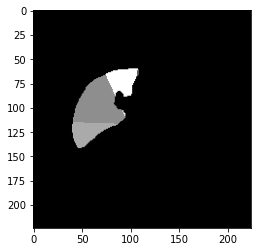

(224, 224, 37)

In [5]:
print(segseg_id)
seg_ni = nib.load(segseg_id)
seg = seg_ni.get_fdata()
seg = np.flip(np.rot90(seg), 1)

plt.imshow(seg[:,:,15], cmap='gray')
plt.show()

seg.shape

N:\2_Analysis\automated_analysis\flint_segmentations\vessel_segmentations\2 point masks -mb/f_5481-vessels-only-mb.nii.gz


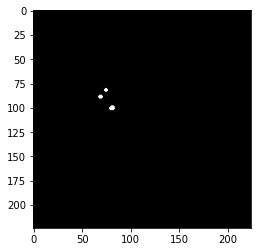

1.0

In [6]:
print(vessel_id)
vessel_ni = nib.load(vessel_id)
vessel = vessel_ni.get_fdata()
vessel = np.flip(np.rot90(vessel), 1)

plt.imshow(vessel[:,:,15], cmap='gray')
plt.show()

vessel.max()

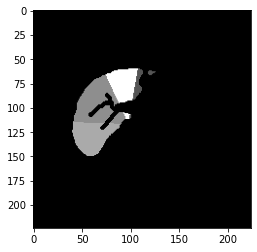

(224, 224, 37)

In [8]:
seg_sub = seg
seg_sub[vessel != 0] = 0

plt.imshow(seg_sub[:,:,18], cmap='gray')
plt.show()

seg_sub.shape

In [9]:
seg_vessel_ni = nib.Nifti1Image(np.flip(np.rot90(seg_sub,3),0), vessel_ni.affine)
nib.save(seg_vessel_ni, os.path.join(output_dir + case_id))